# 绘图及交互

绘图、鼠标交互、滚动条交互都是OpenCV中GUI的重要知识。

In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

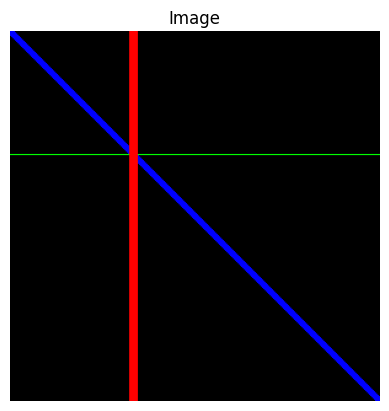

In [4]:
n = 300
img = np.zeros((n+1, n+1,3), np.uint8)
img = cv2.line(img, (0,0), (n, n), (255,0,0),3)
img = cv2.line(img, (0,100), (n,100), (0,255,0),1)
img = cv2.line(img, (100,0), (100, n), (0,0,255),6)
winname = 'Demo19.1'
show(img)

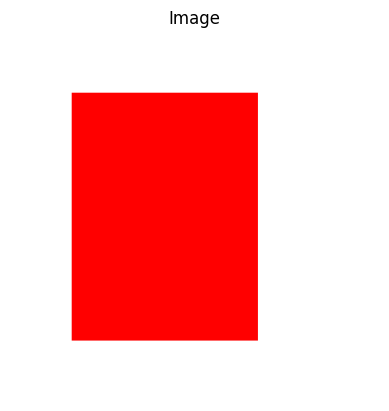

In [5]:
n = 300
img = np.ones((n, n,3), np.uint8)*255
img = cv2.rectangle(img, (50,50), (n-100, n-50), (0,0,255), -1)
winname = 'Demo19.1'
show(img)

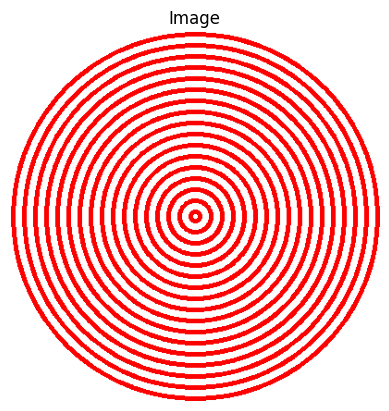

In [6]:
d = 400
img = np.ones((d, d,3), dtype="uint8")*255
(centerX, centerY) = (round(img.shape[1] / 2), round(img.shape[0] / 2))
# 将图像的中心作为圆心，实际值为d/2
red = (0,0,255) # 设置白色变量
for r in range(5, round(d/2),12):
    cv2.circle(img, (centerX, centerY), r, red,3)
      # circle(载体图像，圆心，半径，颜色)
show(img)

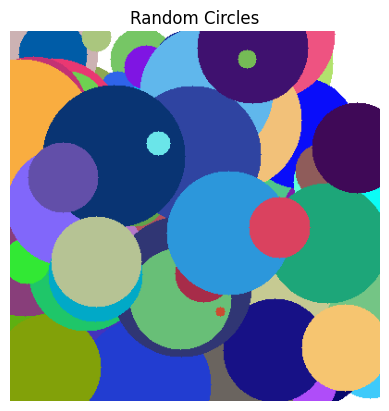

In [7]:
d = 400
img = np.ones((d, d, 3), dtype="uint8")*255
# 生成白色背景
for i in range(0,100):
    centerX = np.random.randint(0, high = d)
    # 生成随机圆心centerX，确保在画布img内
    centerY = np.random.randint(0, high = d)
    # 生成随机圆心centerY，确保在画布img内
    radius = np.random.randint(5, high = d/5)
    # 生成随机半径，值范围为[5, d/5)，最大半径是d/5
    color = np.random.randint(0, high = 256, size = (3, )).tolist()
    # 生成随机颜色，3个[0,256)的随机数
    cv2.circle(img, (centerX, centerY), radius, color, -1)
    # 使用上述随机数在画布img内画圆
show(img, 'Random Circles')

## 在图形上绘制文字

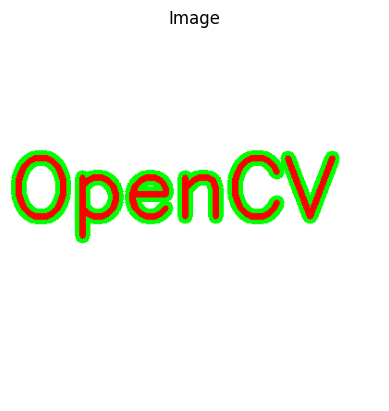

In [9]:
d = 400
img = np.ones((d, d,3), dtype="uint8")*255
# 生成白色背景
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', (0,200), font, 3, (0,255,0),15)
cv2.putText(img, 'OpenCV', (0,200), font, 3, (0,0,255),5)
show(img)

# 鼠标交互

当用户触发鼠标事件时，我们希望对该事件做出响应。例如，用户单击鼠标，我们就画一个圆。

通常的做法是，创建一个OnMouseAction()响应函数，将要实现的操作写在该响应函数内。

# 滚动条
滚动条（Trackbar）在OpenCV中是非常方便的交互工具，它依附于特定的窗口而存在。通过调节滚动条能够设置、获取指定范围内的特定值。